<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Excel-files" data-toc-modified-id="Excel-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Excel files</a></span></li><li><span><a href="#Reading-two-data-and-combine" data-toc-modified-id="Reading-two-data-and-combine-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading two data and combine</a></span></li><li><span><a href="#reading-all-columns-directly" data-toc-modified-id="reading-all-columns-directly-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>reading all columns directly</a></span></li><li><span><a href="#Task-2-(load-data-from-lesson-)-and-compare-shoe-stocks" data-toc-modified-id="Task-2-(load-data-from-lesson-)-and-compare-shoe-stocks-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 2 (load data from lesson ) and compare shoe stocks</a></span></li></ul></div>

In [231]:
import numpy as np
import pandas as pd


# scipy.stats.norm.ppf(q) # q = 1-p & p is 1 - (1-CI)/2/100
# scipy.stats.t.ppf(q,df) # df is degree of freedom
# e.g. 1 - (1 - 0.95)/2 = 0.975 for 95% confidence interval
import scipy



# pandas display settings
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# ipython display
from IPython.display import Image

# data directories
snap_dir = '../data/snapshots/'
data_dir = '../data/excel/'

# Excel files

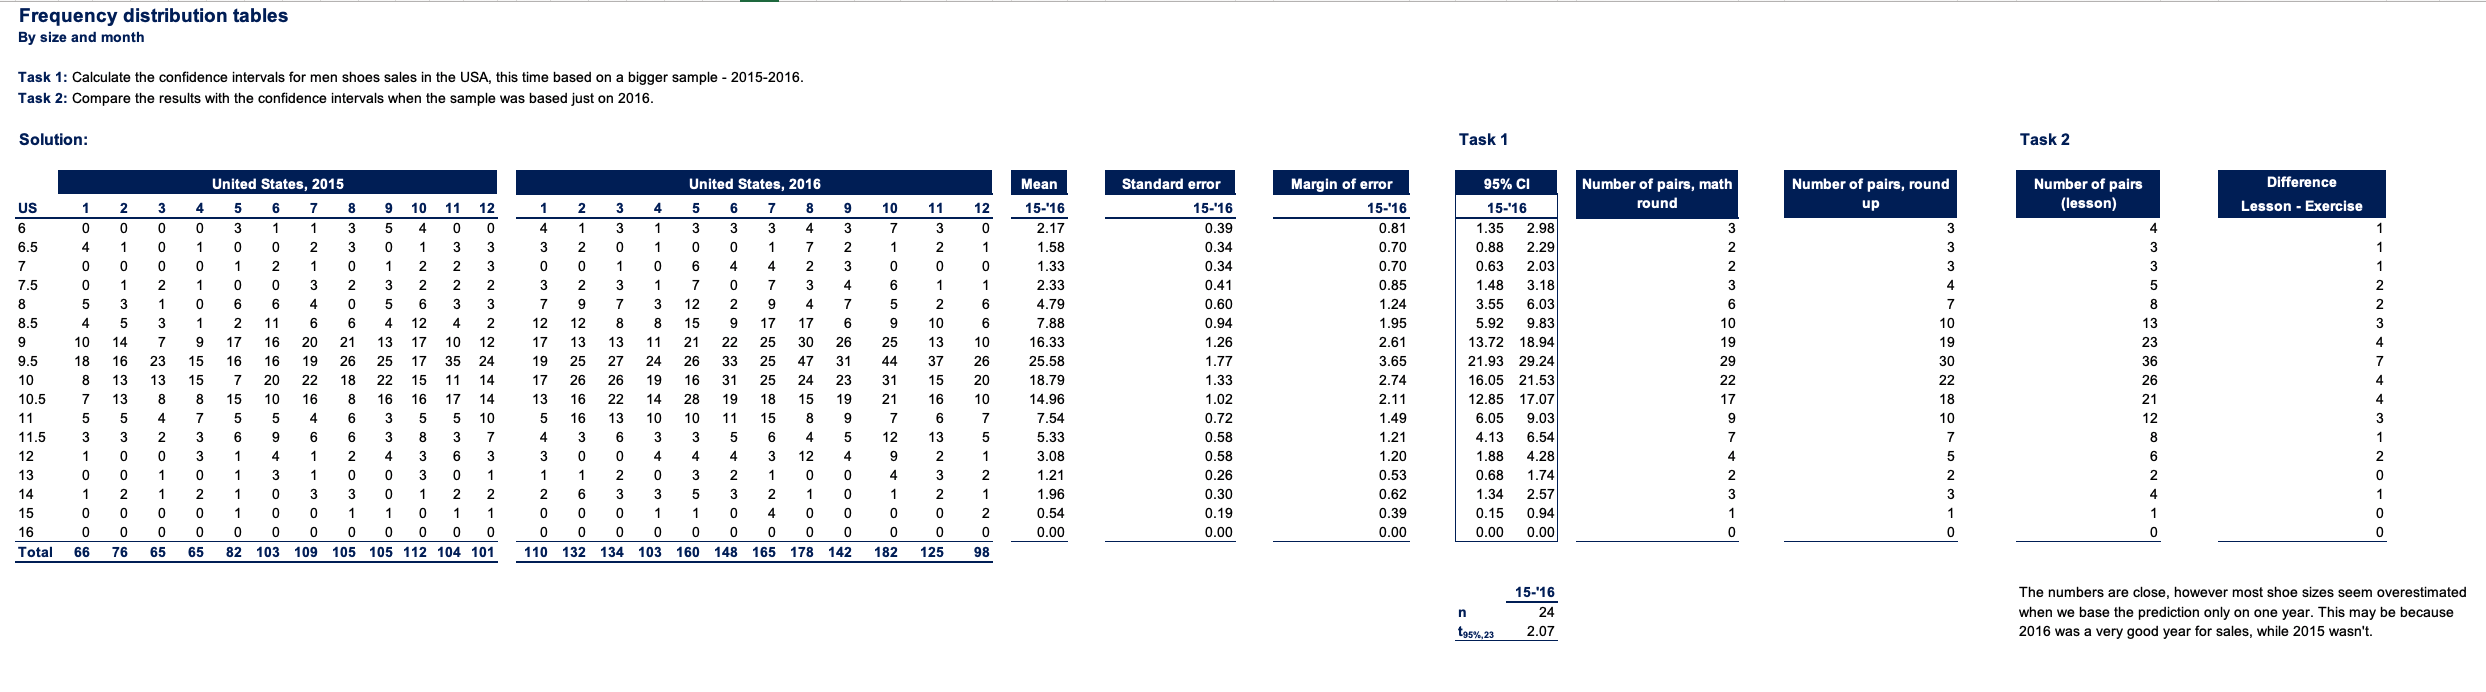

In [8]:
Image(filename=snap_dir + 'lec73_sol1.png',width=3000,height=3000)

# Reading two data and combine

In [30]:
df1 = pd.read_excel(data_dir + '3.17.Practical-example.Confidence-intervals-exercise.xlsx',
                  sheet_name = 'Tasks 1,2',
                  skiprows = 9, # header row is 10 in excel.
                  skipfooter= 32-28+1, # last row is 32 in excel, total row is 28.
                  index_col = 0,
                  usecols = "B:N")


print(df1.columns)
print(df1.shape)
df1

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')
(17, 12)


,1,2,3,4,5,6,7,8,9,10,11,12
US,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0
6.5,4,1,0,1,0,0,2,3,0,1,3,3
7.0,0,0,0,0,1,2,1,0,1,2,2,3
7.5,0,1,2,1,0,0,3,2,3,2,2,2
8.0,5,3,1,0,6,6,4,0,5,6,3,3
8.5,4,5,3,1,2,11,6,6,4,12,4,2
9.0,10,14,7,9,17,16,20,21,13,17,10,12
9.5,18,16,23,15,16,16,19,26,25,17,35,24
10.0,8,13,13,15,7,20,22,18,22,15,11,14


In [37]:
df2 = pd.read_excel(data_dir + '3.17.Practical-example.Confidence-intervals-exercise.xlsx',
                  sheet_name = 'Tasks 1,2',
                  skiprows = 9, # header row is 10 in excel.
                  skipfooter= 32-28+1, # last row is 32 in excel, total row is 28.
                  index_col = 0,
                  usecols = "B,P:AA")



print(df2.columns)
print(df2.shape)
df2

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')
(17, 12)


,1,2,3,4,5,6,7,8,9,10,11,12
US,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,1,0,6,4,4,2,3,0,0,0
7.5,3,2,3,1,7,0,7,3,4,6,1,1
8.0,7,9,7,3,12,2,9,4,7,5,2,6
8.5,12,12,8,8,15,9,17,17,6,9,10,6
9.0,17,13,13,11,21,22,25,30,26,25,13,10
9.5,19,25,27,24,26,33,25,47,31,44,37,26
10.0,17,26,26,19,16,31,25,24,23,31,15,20


In [38]:
df2 = df2.rename(columns=lambda n: n+12)
df2

,13,14,15,16,17,18,19,20,21,22,23,24
US,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,1,0,6,4,4,2,3,0,0,0
7.5,3,2,3,1,7,0,7,3,4,6,1,1
8.0,7,9,7,3,12,2,9,4,7,5,2,6
8.5,12,12,8,8,15,9,17,17,6,9,10,6
9.0,17,13,13,11,21,22,25,30,26,25,13,10
9.5,19,25,27,24,26,33,25,47,31,44,37,26
10.0,17,26,26,19,16,31,25,24,23,31,15,20


In [43]:
df = pd.concat([df1,df2],axis=1)
print(df.columns)
print(df.shape)
df

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')
(17, 24)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
US,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20


# reading all columns directly

In [284]:
df = pd.read_excel(data_dir + '3.17.Practical-example.Confidence-intervals-exercise.xlsx',
                  sheet_name = 'Tasks 1,2',
                  skiprows = 9, # header row is 10 in excel.
                  skipfooter= 32-28+1, # last row is 32 in excel, total row is 28.
                  index_col = 0,
                  usecols = "B:N,P:AA")



print(df.columns)
print(df.shape)

df.columns = list(range(24))
# note: total number of items 
total_num_items = df.sum().sum() # 2770
n = df.shape[1] # number of columns

print('n = ', n)

# add total row at bottom
df.loc['Total']= df.sum()

# add mean column
df['mean'] = df.mean(axis=1).round(2)

df

Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,     11,     12,  '1.1',  '2.1',  '3.1',  '4.1',  '5.1',  '6.1',
        '7.1',  '8.1',  '9.1', '10.1', '11.1', '12.1'],
      dtype='object')
(17, 24)
n =  24


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean
US,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79


In [285]:
df['std_err'] = df[list(range(24))].std(axis=1)/np.sqrt(n)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err
US,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583


In [286]:
# checking first row
a = df.iloc[0,0:24]
a

0     0.0
1     0.0
2     0.0
3     0.0
4     3.0
5     1.0
6     1.0
7     3.0
8     5.0
9     4.0
10    0.0
11    0.0
12    4.0
13    1.0
14    3.0
15    1.0
16    3.0
17    3.0
18    3.0
19    4.0
20    3.0
21    7.0
22    3.0
23    0.0
Name: 6.0, dtype: float64

In [287]:
a.mean() # 2.1666666666666665

2.1666666666666665

In [288]:
a.mean().round(2) # 2.17

2.17

In [289]:
a.std() # 1.9261736493723074

1.9261736493723074

In [290]:
a.std()/np.sqrt(len(a)) # 0.39317854974639244

0.39317854974639244

In [291]:
# t-score

In [292]:
deg_fr = n -1
deg_fr

23

In [293]:
q = 1 - (1 - 0.95)/2
q

0.975

In [294]:
import scipy
t_score = scipy.stats.t.ppf(q,deg_fr)
t_score

2.0686576104190406

In [295]:
df['margin_err'] = df['std_err'] * t_score
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err
US,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178


In [296]:
df['ci_low'] = df['mean'] - df['margin_err']
df['ci_high'] = df['mean'] + df['margin_err']
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178


In [297]:
df['round'] = df['ci_high'].round(0).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high,round
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352,3
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466,2
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705,2
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624,3
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814,6
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237,10
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934,19
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546,29
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178,22


In [298]:
df['round_up'] = df['ci_high'].apply(np.ceil).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high,round,round_up
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352,3,3
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466,2,3
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705,2,3
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624,3,4
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814,6,7
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237,10,10
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934,19,19
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546,29,30
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178,22,22


# Task 2 (load data from lesson ) and compare shoe stocks

In [299]:
df3 = pd.read_excel(data_dir + '3.17.Practical-example.Confidence-intervals-lesson.xlsx',
                  sheet_name = 'United States Men',
                  skiprows = 7-1,
                  skipfooter= 1,
                  index_col = 0,
                  usecols = "B,Y")



df3.columns = ['pairs_2016']
print(df3.shape)
df3

(17, 1)


,pairs_2016
US,
6.0,4.037360
6.5,2.876121
7.0,2.989747
7.5,4.679971
8.0,8.007369
8.5,13.195407
9.0,23.123398
9.5,35.666277
10.0,26.165154


In [300]:
df3['round_2016'] = df3['pairs_2016'].round(0).astype(int)
df3

,pairs_2016,round_2016
US,,
6.0,4.037360,4
6.5,2.876121,3
7.0,2.989747,3
7.5,4.679971,5
8.0,8.007369,8
8.5,13.195407,13
9.0,23.123398,23
9.5,35.666277,36
10.0,26.165154,26


In [301]:
df['round_2016'] = df3['round_2016']
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high,round,round_up,round_2016
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352,3,3,4.0
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466,2,3,3.0
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705,2,3,3.0
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624,3,4,5.0
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814,6,7,8.0
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237,10,10,13.0
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934,19,19,23.0
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546,29,30,36.0
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178,22,22,26.0


In [302]:
df['diff'] =  df['round_2016'] - df['round'] 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high,round,round_up,round_2016,diff
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352,3,3,4.0,1.0
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466,2,3,3.0,1.0
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705,2,3,3.0,1.0
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624,3,4,5.0,2.0
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814,6,7,8.0,2.0
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237,10,10,13.0,3.0
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934,19,19,23.0,4.0
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546,29,30,36.0,7.0
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178,22,22,26.0,4.0


In [317]:
# clean up and insert nans to last rows
df.iloc[-1,24:] = np.nan
df['diff'] = df['diff'].fillna(0).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mean,std_err,margin_err,ci_low,ci_high,round,round_up,round_2016,diff
US,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.0,0,0,0,0,3,1,1,3,5,4,0,0,4,1,3,1,3,3,3,4,3,7,3,0,2.17,0.393179,0.813352,1.356648,2.983352,3.0,3.0,4.0,1
6.5,4,1,0,1,0,0,2,3,0,1,3,3,3,2,0,1,0,0,1,7,2,1,2,1,1.58,0.340059,0.703466,0.876534,2.283466,2.0,3.0,3.0,1
7.0,0,0,0,0,1,2,1,0,1,2,2,3,0,0,1,0,6,4,4,2,3,0,0,0,1.33,0.338725,0.700705,0.629295,2.030705,2.0,3.0,3.0,1
7.5,0,1,2,1,0,0,3,2,3,2,2,2,3,2,3,1,7,0,7,3,4,6,1,1,2.33,0.411196,0.850624,1.479376,3.180624,3.0,4.0,5.0,2
8.0,5,3,1,0,6,6,4,0,5,6,3,3,7,9,7,3,12,2,9,4,7,5,2,6,4.79,0.598849,1.238814,3.551186,6.028814,6.0,7.0,8.0,2
8.5,4,5,3,1,2,11,6,6,4,12,4,2,12,12,8,8,15,9,17,17,6,9,10,6,7.88,0.944689,1.954237,5.925763,9.834237,10.0,10.0,13.0,3
9.0,10,14,7,9,17,16,20,21,13,17,10,12,17,13,13,11,21,22,25,30,26,25,13,10,16.33,1.262139,2.610934,13.719066,18.940934,19.0,19.0,23.0,4
9.5,18,16,23,15,16,16,19,26,25,17,35,24,19,25,27,24,26,33,25,47,31,44,37,26,25.58,1.766144,3.653546,21.926454,29.233546,29.0,30.0,36.0,7
10.0,8,13,13,15,7,20,22,18,22,15,11,14,17,26,26,19,16,31,25,24,23,31,15,20,18.79,1.325583,2.742178,16.047822,21.532178,22.0,22.0,26.0,4


In [319]:
# comparison of 2016 to 2015-16
df['diff'].values

array([1, 1, 1, 2, 2, 3, 4, 7, 4, 4, 3, 1, 2, 0, 1, 0, 0, 0])

In [320]:
# we can see that all the values are non-negative this means sales in 2016 was
# higher than in 2015.